# **Description**

**Search query**:

    For PI.csv 
    ( "physics-informed”) 


**Inclussion**

1. The article is written in English <br />
2. published between January 2019 and August 2024.
3. The article must be peer-reviewed and not a secondary manuscript like a survey, systematic review, mapping, or other types of reviews.

**Filter process**

If there are the same articles in different publishers
If there is incomplete article information or incorrect parsing.
Articles that have been excluded and have four components of the properties specified in the title, keywords or abstract

**Result**

Using mentioned search query above, we collected 6543 papers for further analysis




# **Importing Libraries**

In [108]:
import pandas as pd
import os, time, csv, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from collections import Counter
import pycountry

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# **Parameters**

In [143]:
FILE_NAME = 'PI.csv'
YEAR = 2010
WORDS = 'PDE | partial differential equation'

df = pd.read_csv(FILE_NAME)
if not os.path.exists(FILE_NAME.replace('.csv', '.xlsx')):
    df.to_excel(FILE_NAME.replace('.csv', '.xlsx'), index=False)
l_0 = len(df)

drop_invalid_df = df.dropna(subset=['Title'])
l_invalid = len(drop_invalid_df)

drop_title_df = drop_invalid_df.drop_duplicates(subset=['Title'])
l_duplicated = len(drop_title_df)

above_2019_df = drop_title_df.loc[drop_title_df['Year'] > YEAR]
l_above_2019 = len(above_2019_df)

document_types_df = above_2019_df.loc[
    (above_2019_df['Document Type'] == 'Article') |
    (above_2019_df['Document Type'] == 'Conference paper') 
]
l_document_types = len(document_types_df)

keywords_df = document_types_df.loc[
    (
        df['Index Keywords'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Author Keywords'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Title'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Abstract'].str.contains(WORDS, case=False, na=False)
    ) 
]
l_keywords = len(keywords_df)

languages_df = keywords_df.loc[
    df['Language of Original Document'] == 'English'
]
l_languages = len(languages_df)

PRISMA_df = languages_df.copy()

print(f"\n\nOriginal data: {l_0}")
print(f'Invalid data: {l_0-l_invalid} | Eligible: {l_invalid}')
print(f"duplicated data: {l_invalid-l_duplicated} | Eligible: {l_duplicated}")
print(f"Below 2019 data: {l_duplicated-l_above_2019} | Eligible: {l_above_2019}")
print(f"Document type for article paper data: {l_above_2019-l_document_types} | Eligible: {l_document_types}")
print(f"Not in the keywords: {l_document_types-l_keywords} | Eligible: {l_keywords}")
print(f"Not in English: {l_keywords-l_languages} | Eligible: {l_languages}")



Original data: 6257
Invalid data: 0 | Eligible: 6257
duplicated data: 79 | Eligible: 6178
Below 2019 data: 5 | Eligible: 6173
Document type for article paper data: 321 | Eligible: 5852
Not in the keywords: 4578 | Eligible: 1274
Not in English: 40 | Eligible: 1234


# **Helper Function**

In [110]:
fontsize={'legend':12, 'text':8, 'labels':8, 'xticks':8}
colors = ["#808080", "k", "r", 'y', 'm', 'b']

def subcategorybar(
    X, 
    vals, 
    colors, 
    labels, 
    markers='^', 
    width=0.8, 
    major=1000, 
    minor=500, 
    bar=True, 
    plot=False, 
    spines=False, 
    rotation=45,
    fontsize=fontsize,
    show_text=False
):
    n = len(vals)
    _X = np.arange(len(X))
    fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
    for i in range(n):
        print(f"L: {labels[i]} | colors : {colors[i]} | {i} | {vals[i]}")
        if bar:
            bars = ax.bar(
                _X - width/2. + i/float(n)*width, 
                vals[i], 
                width=width/float(n), 
                align="edge",
                color=colors[i],
                label=labels[i]
            )   
            if show_text:
                for bar in bars:
                    yval = bar.get_height()
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,  # X position
                        yval + 0.1,  # Y position (slightly above the bar)
                        round(yval, 2),  # The value of the bar, rounded to 2 decimals
                        ha='center',  # Horizontal alignment
                        va='bottom',  # Vertical alignment
                        fontsize=fontsize['text']  # Font size
                    )
        if plot:
            print(markers)
            ax.plot(_X , vals[i], marker = markers[i], lw=0.45, color=colors[i], label=labels[i], mfc='none', markersize=5)
            plt.grid()

    plt.xticks(_X, X)
    
    ax.yaxis.set_minor_locator(MultipleLocator(minor))
    ax.set_xticks(range(0, len(X)), X, rotation=rotation, fontsize=fontsize['xticks'])
    ax.yaxis.set_major_locator(MultipleLocator(major))
    ax.spines[['right', 'top']].set_visible(spines)

    plt.legend(fontsize=fontsize['legend'])

# **Before PRISMA**

## 1) Most productive countries

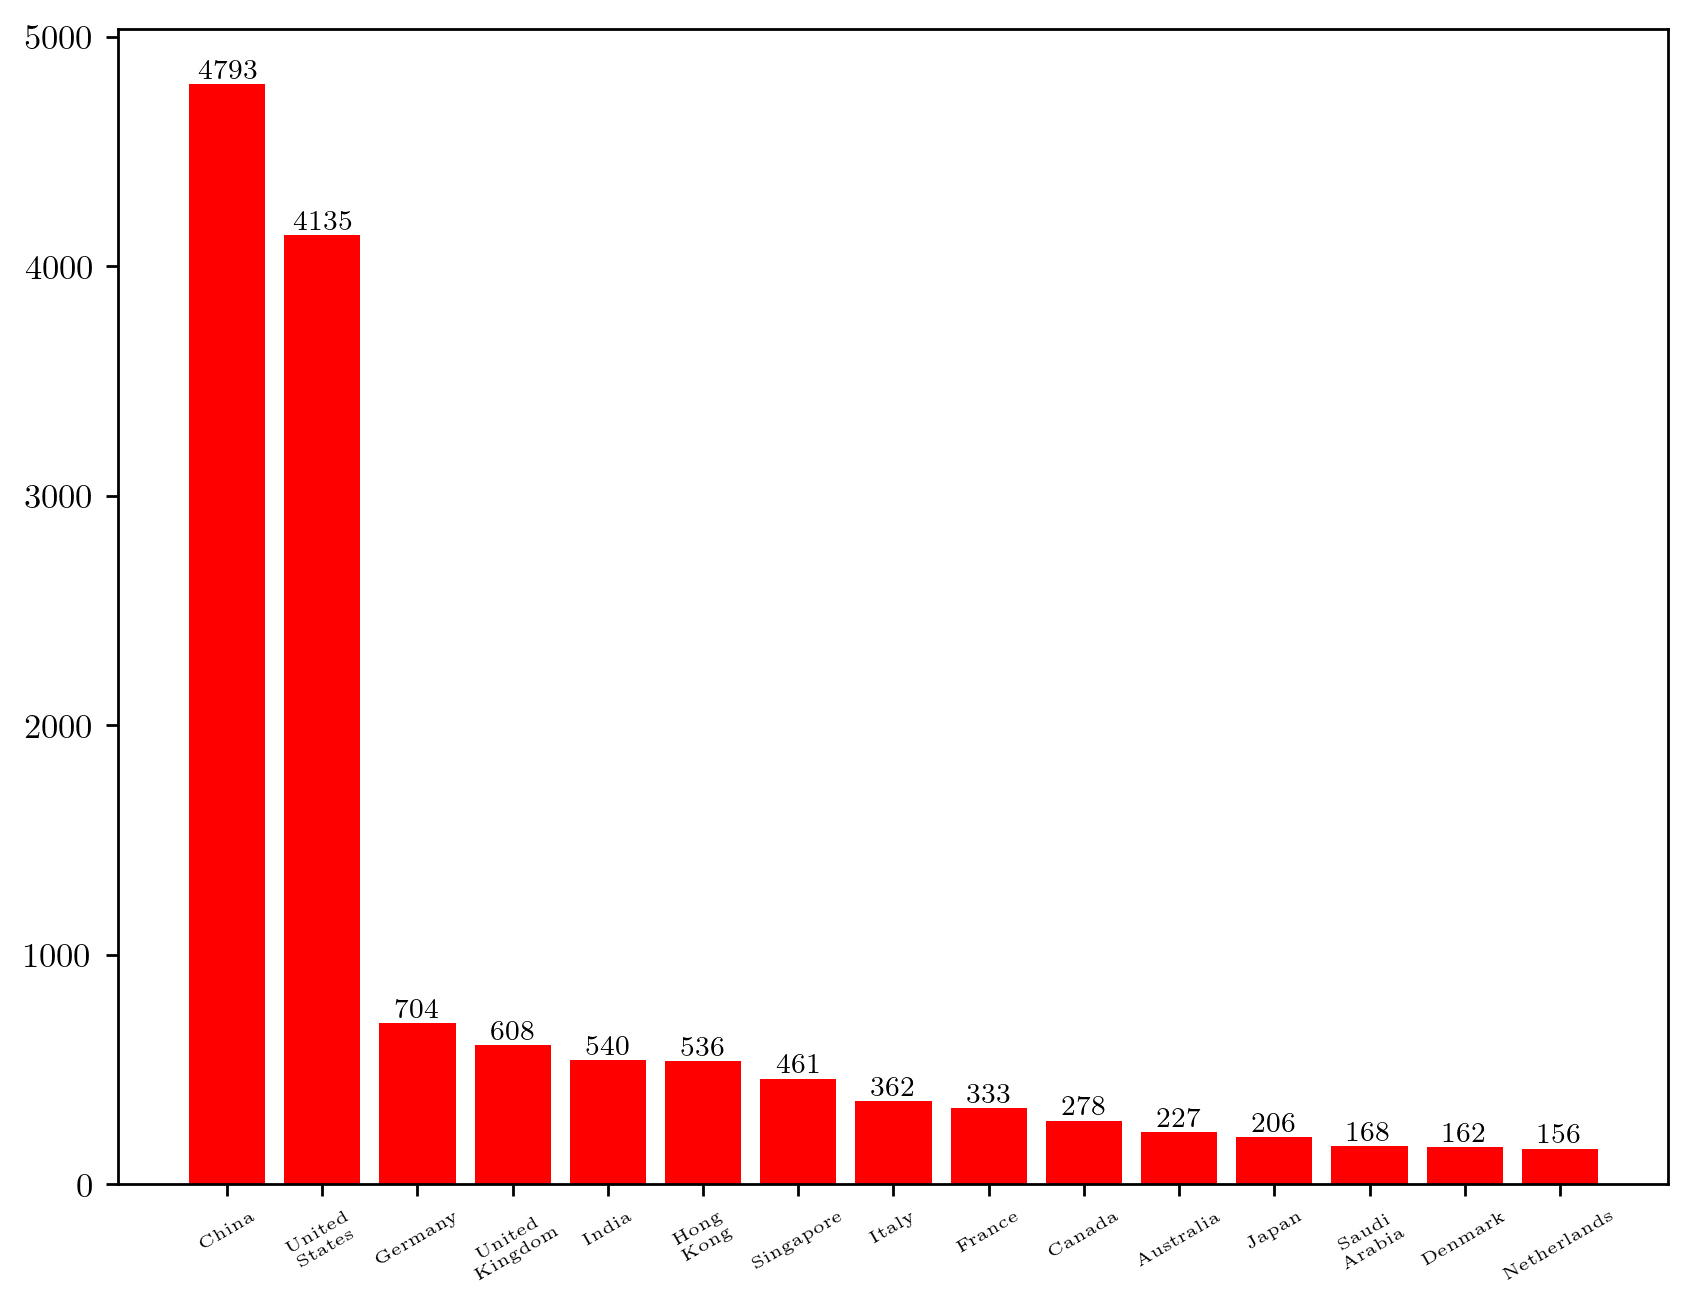

In [111]:
countries = {}
count = 0

for affiliations in df['Affiliations']:
    if not pd.isna(affiliations):
        affiliation = affiliations.replace('; ', ', ').split(', ')
        for country in pycountry.countries:
            for country_affiliation in affiliation:
                if country.name in country_affiliation: 
                    if country.name in countries:
                        countries[country.name] += 1
                    else:
                        countries[country.name] = 0
                        
countries = dict(sorted(countries.items(), key=lambda x:x[1], reverse=True))
N = 15
country_names = [i for i in countries.keys()][:N]
country_frequencies = [i for i in countries.values()][:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    country_names, country_frequencies, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

#ax.set_ylim([0, 15])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
country_names = [country_name.replace(' ', '\n') for country_name in country_names]
ax.set_xticks(range(0, len(country_names)), country_names, rotation=30, fontsize=5)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 2) Most productive authors

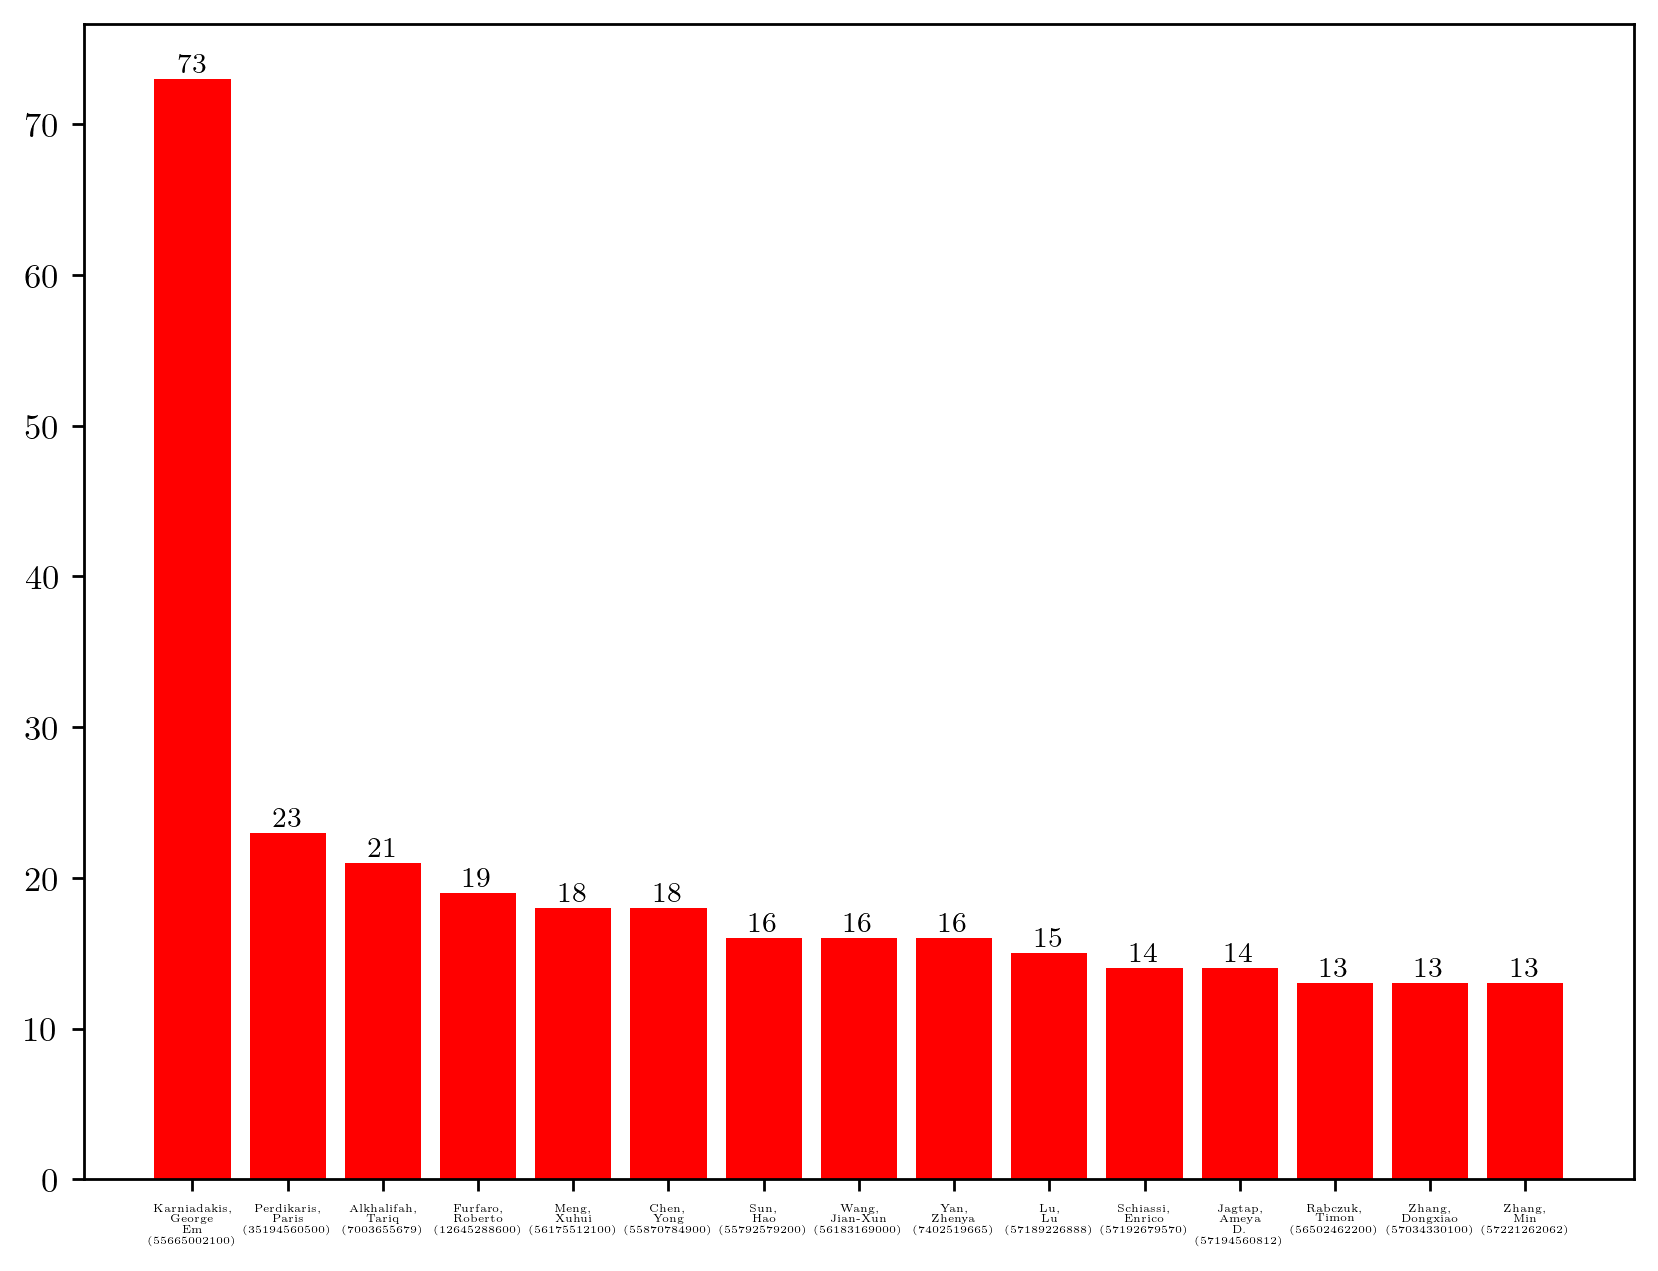

In [112]:
authors = {}
count = 0

for author_names in df['Author full names']:
    if not pd.isna(author_names):
        author_names = author_names.split('; ')
        for author_name in author_names: 
            if author_name in authors:
                authors[author_name] += 1
            else:
                authors[author_name] = 0
                        
authors = dict(sorted(authors.items(), key=lambda x:x[1], reverse=True))
N = 15
author_names = [i for i in authors.keys()][:N]
author_frequencies = [i for i in authors.values()][:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    author_names, author_frequencies, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

#ax.set_ylim([0, 15])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
author_names = [author_name.replace(' ', '\n') for author_name in author_names]
ax.set_xticks(range(0, len(author_names)), author_names, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 3) Journal publisher based on highest number count

### a) general

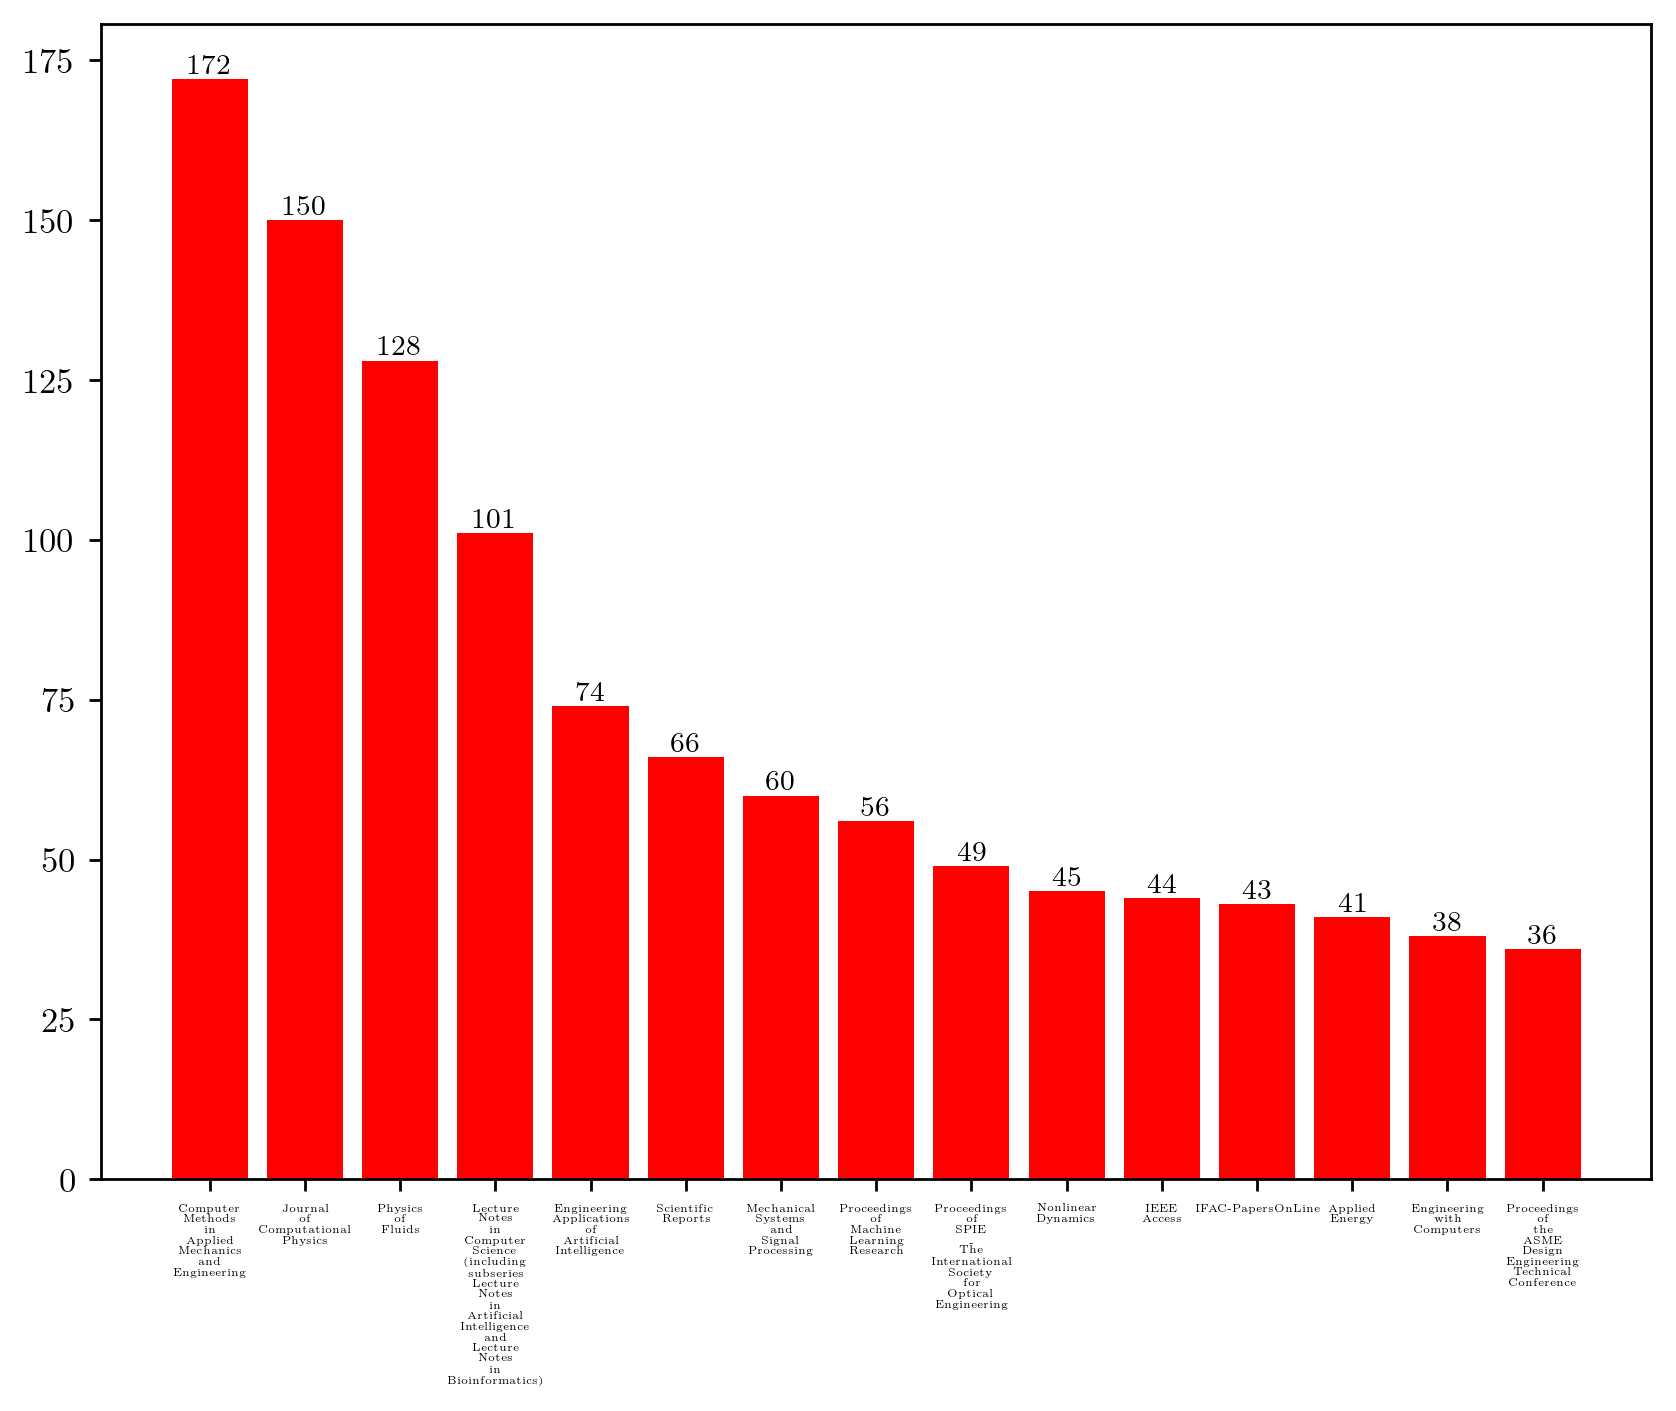

In [113]:
N = 15
X = df.groupby(['Source title']).count().sort_values(by='Title', ascending=False).index.to_list()[:N]
Y =  df.groupby(['Source title']).count().sort_values(by='Title', ascending=False)['Title'].to_list()[:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    X, Y, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

# ax.set_ylim([0, 5])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
X = [x.replace(' ', '\n') for x in X]
ax.set_xticks(range(0, len(X)), X, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

### b) review paper

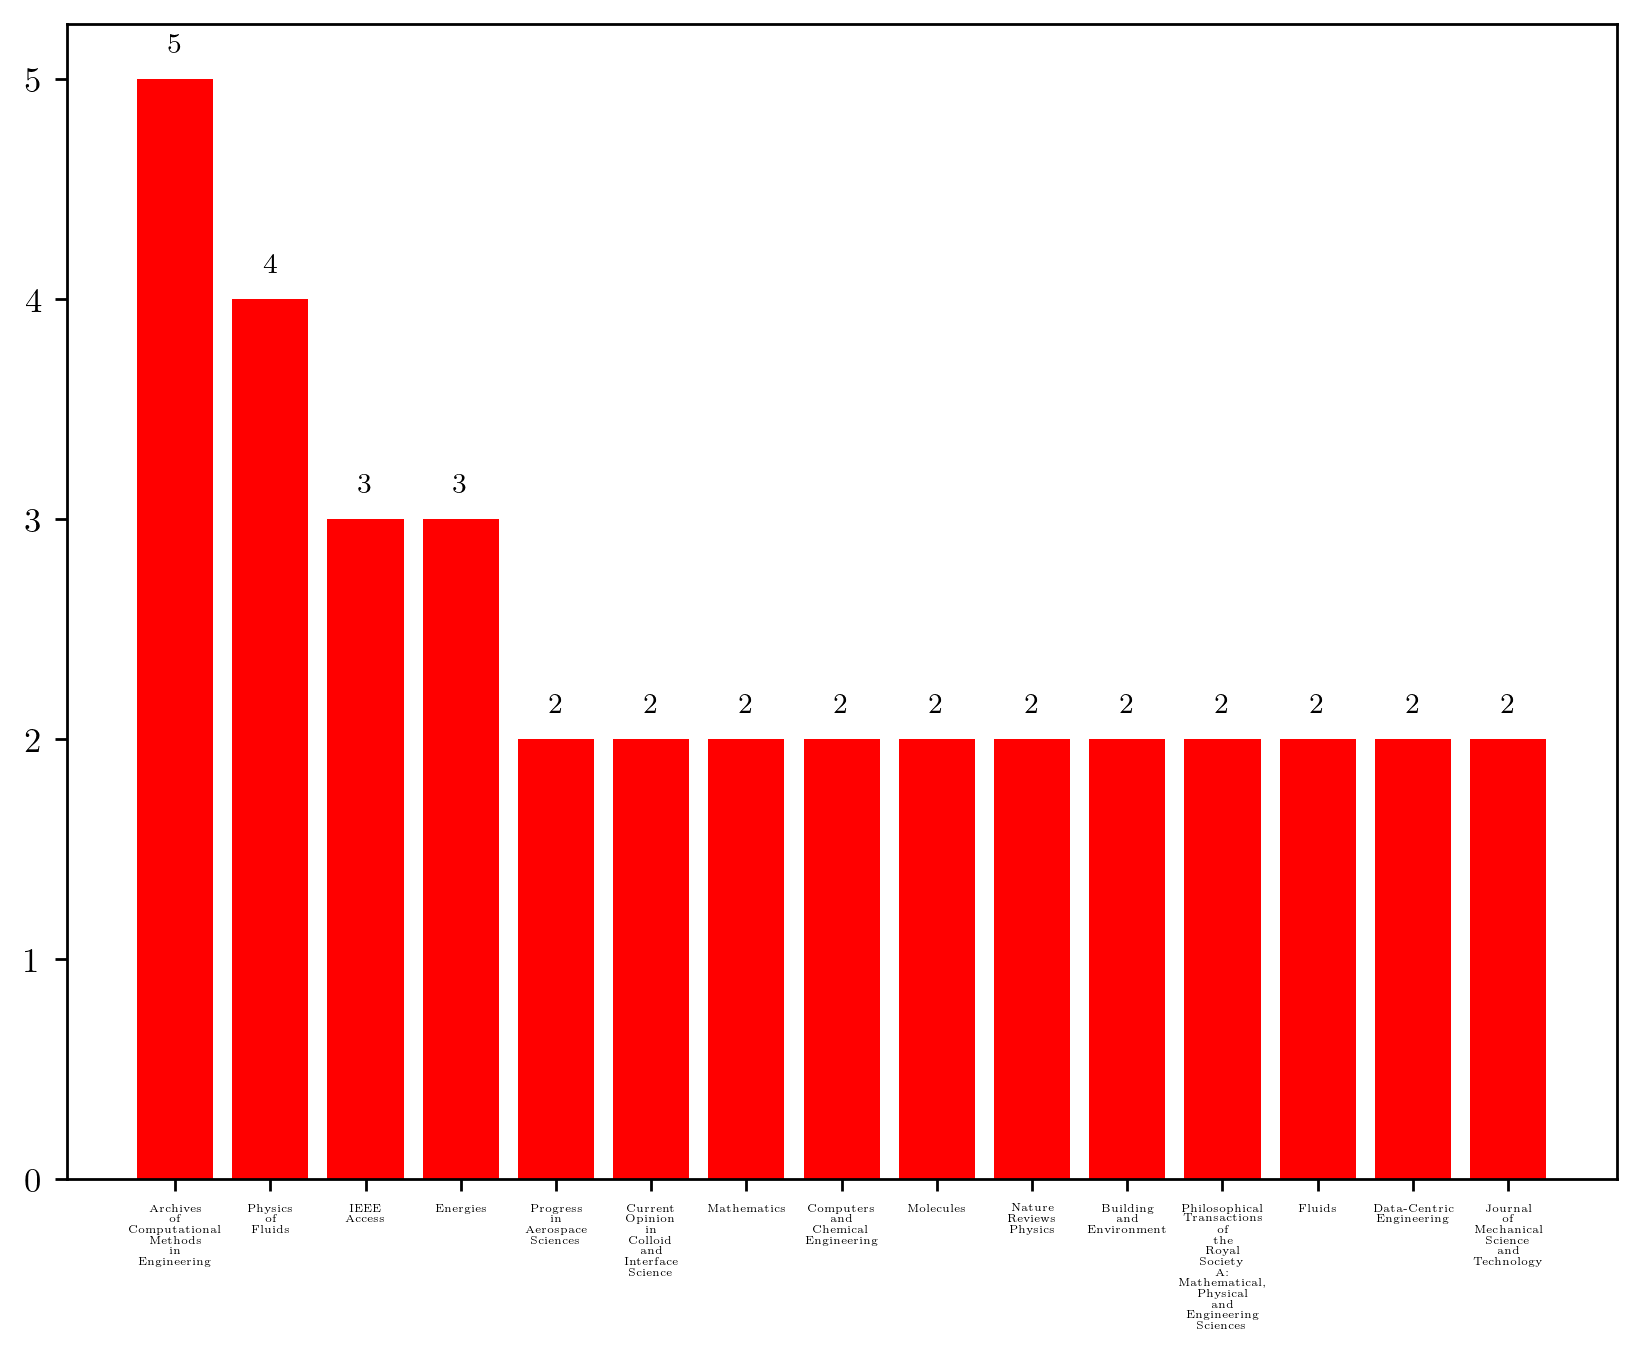

In [114]:
N = 15
X = df.loc[df['Document Type'] == 'Review'].groupby(['Source title']).count().sort_values(by='Title', ascending=False).index.to_list()[:N]
Y =  df.loc[df['Document Type'] == 'Review'].groupby(['Source title']).count().sort_values(by='Title', ascending=False)['Title'].to_list()[:N]

# Validation: df.loc[(df['Source title'] == 'Archives of Computational Methods in Engineering') & (df['Document Type'] == 'Review')]
fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    X, Y, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

# ax.set_ylim([0, 5])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
X = [x.replace(' ', '\n') for x in X]
ax.set_xticks(range(0, len(X)), X, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 4) Journal publisher based on highest number citation (paper review)

### a) general

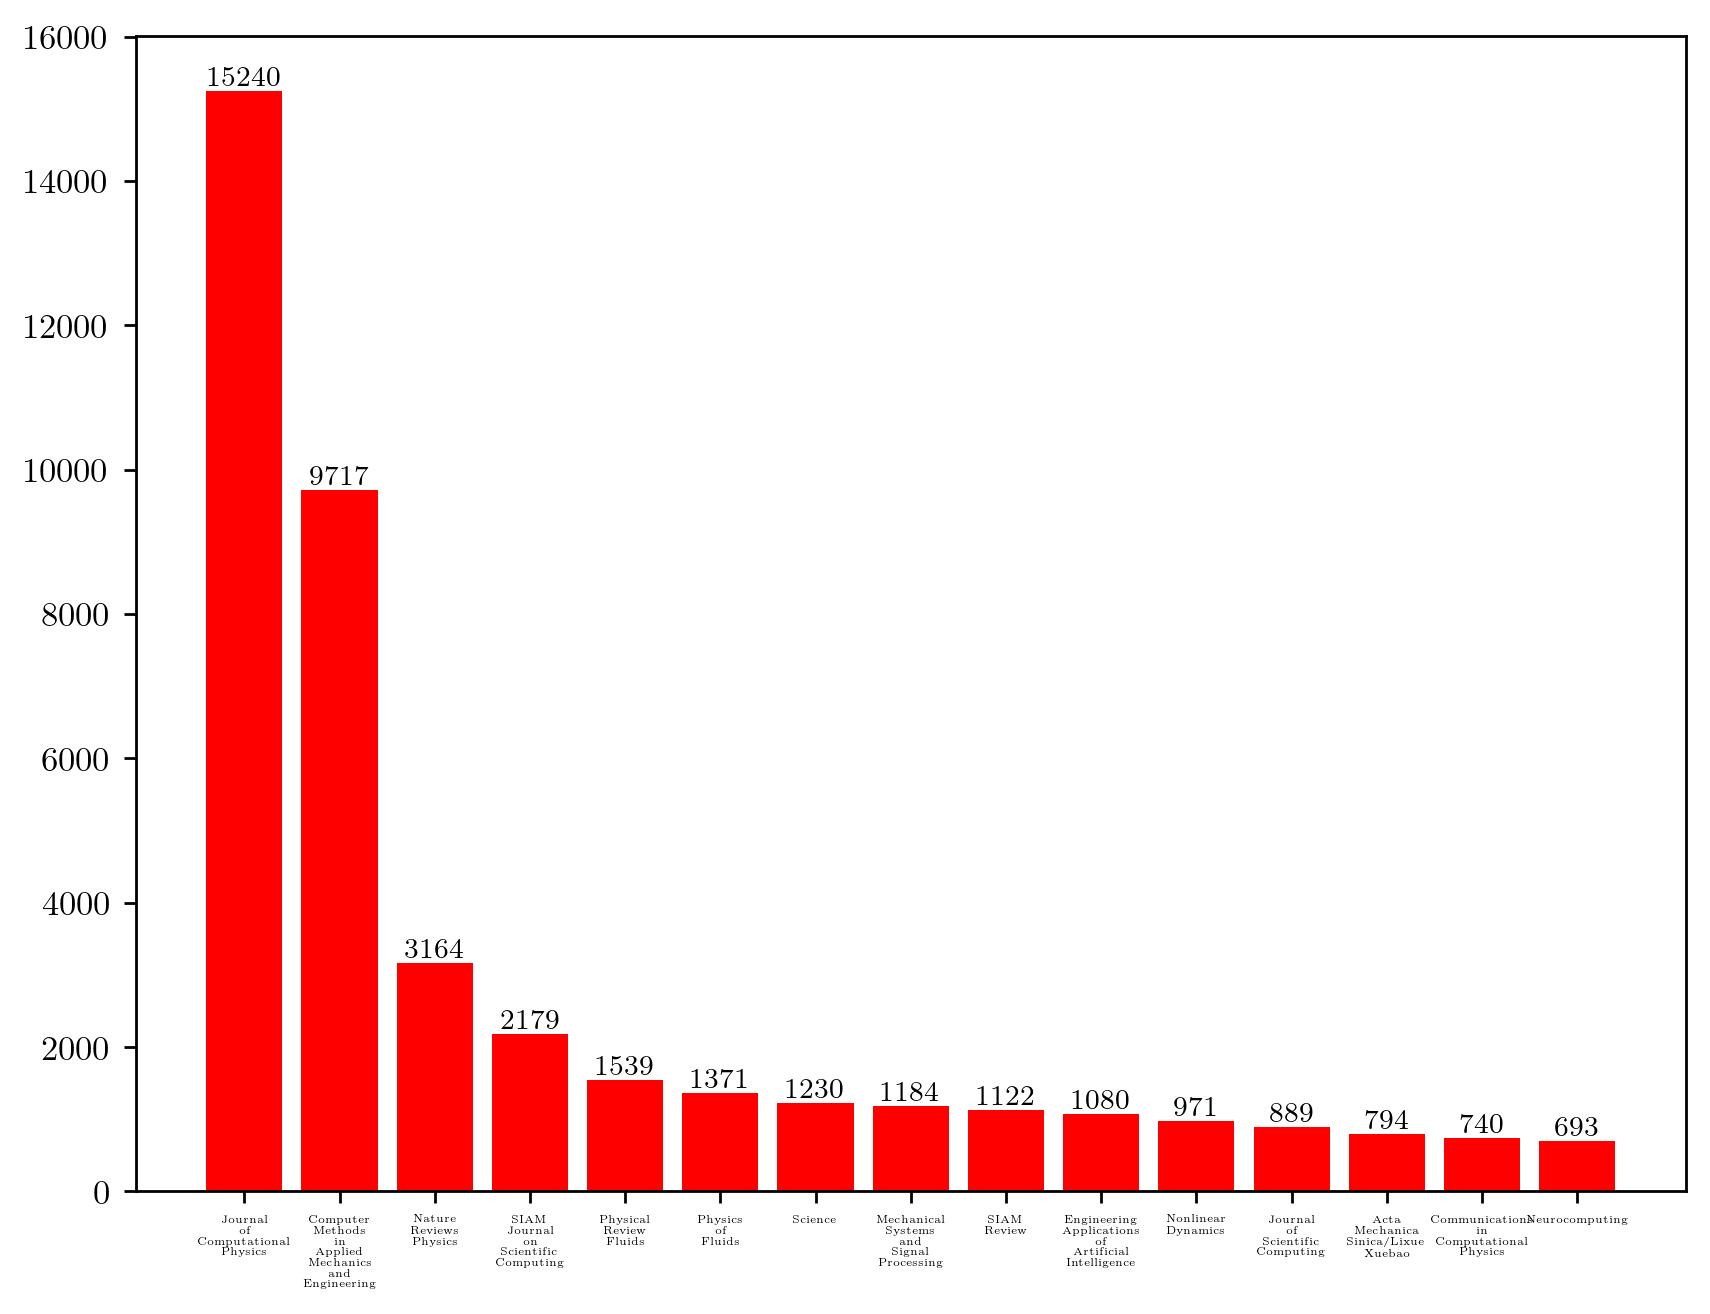

In [115]:
N = 15
X = df.groupby(['Source title']).sum().sort_values(by='Cited by', ascending=False).index.to_list()[:N]
Y =  df.groupby(['Source title']).sum().sort_values(by='Cited by', ascending=False)['Cited by'].to_list()[:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    X, Y, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

# ax.set_ylim([0, 5])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
X = [x.replace(' ', '\n') for x in X]
ax.set_xticks(range(0, len(X)), X, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

### b) review paper

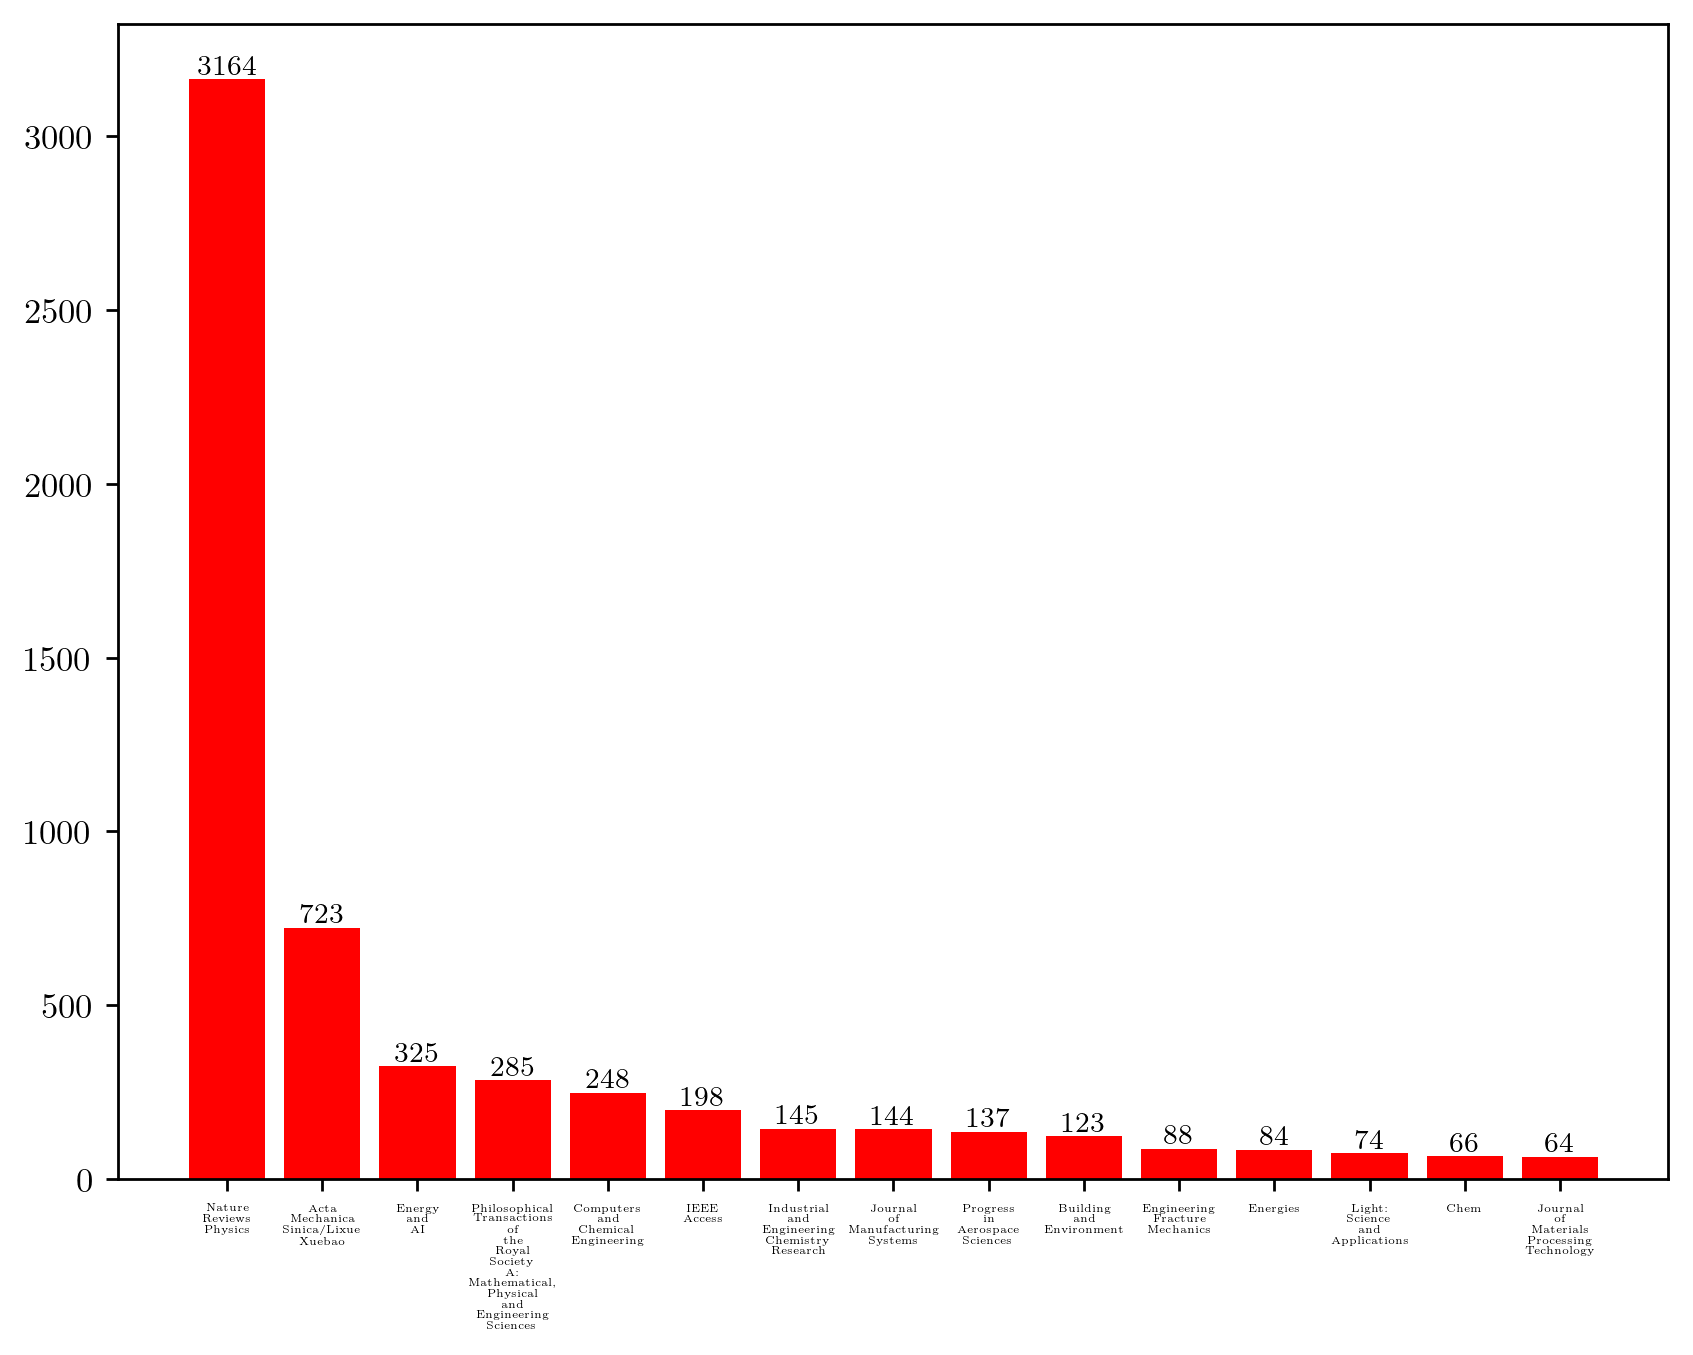

In [116]:
N = 15
X = df.loc[df['Document Type'] == 'Review'].groupby(['Source title']).sum().sort_values(by='Cited by', ascending=False).index.to_list()[:N]
Y =  df.loc[df['Document Type'] == 'Review'].groupby(['Source title']).sum().sort_values(by='Cited by', ascending=False)['Cited by'].to_list()[:N]

# Validation: df.loc[(df['Source title'] == 'Archives of Computational Methods in Engineering') & (df['Document Type'] == 'Review')]
fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    X, Y, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

# ax.set_ylim([0, 5])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
X = [x.replace(' ', '\n') for x in X]
ax.set_xticks(range(0, len(X)), X, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 5) Review article related on topics

In [148]:
df.loc[df['Document Type'] == 'Review'].to_excel('./SOTA/Review_papers.xlsx')

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
138,Duran A.; Waibel C.; Piccioni V.; Bickel B.; S...,"Duran, Ayca (56635092300); Waibel, Christoph (...",56635092300; 57190006557; 57367152200; 5593190...,A review on artificial intelligence applicatio...,2025,Building and Environment,269,NaN,112310,NaN,...,NaN,BUEND,NaN,English,Build. Environ.,Review,Final,NaN,Scopus,2-s2.0-85210859698
141,Mangal D.; Jha A.; Dabiri D.; Jamali S.,"Mangal, Deepak (57222552398); Jha, Anushka (57...",57222552398; 57208337242; 58155225000; 5554983...,Data-driven techniques in rheology: Developmen...,2025,Current Opinion in Colloid and Interface Science,75,NaN,101873,NaN,...,NaN,COCSF,NaN,English,Curr. Opin. Colloid Interface Sci.,Review,Final,NaN,Scopus,2-s2.0-85210102423
197,Faegh M.; Ghungrad S.; Oliveira J.P.; Rao P.; ...,"Faegh, Meysam (59446974600); Ghungrad, Suyog (...",59446974600; 57226531186; 55601590000; 5739635...,A review on physics-informed machine learning ...,2025,Journal of Manufacturing Processes,133,NaN,NaN,524,...,NaN,NaN,NaN,English,J. Manuf. Processes,Review,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85210539818
243,Tang S.-Y.; Yuan Y.-H.; Sun Y.-N.; Yao S.-J.; ...,"Tang, Si-Yuan (55747255500); Yuan, Yun-Hao (58...",55747255500; 58293618900; 57217137450; 7402471...,Developing physics-informed neural networks fo...,2025,Journal of Chromatography A,1739,NaN,465514,NaN,...,NaN,JCRAE,39566288.0,English,J. Chromatogr. A,Review,Final,NaN,Scopus,2-s2.0-85209382289
266,Qiu Q.; Gu Y.; Ren Y.; Mou C.; Hu C.; Ding H.;...,"Qiu, Qianfeng (59282704000); Gu, Yunqing (5439...",59282704000; 54392964100; 36469020600; 5721774...,Research progress in hydrofoil cavitation pred...,2025,Physics of Fluids,37,1,011301,NaN,...,NaN,PHFLE,NaN,English,Phys. Fluids,Review,Final,NaN,Scopus,2-s2.0-85214359941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Kudyshev Z.A.; Shalaev V.M.; Boltasseva A.,"Kudyshev, Zhaxylyk A. (55405248200); Shalaev, ...",55405248200; 7005627097; 6602503138,Machine Learning for Integrated Quantum Photonics,2021,ACS Photonics,8,1,NaN,34,...,NaN,NaN,NaN,English,ACS Photonics,Review,Final,NaN,Scopus,2-s2.0-85099019686
6043,Haghighatlari M.; Li J.; Heidar-Zadeh F.; Liu ...,"Haghighatlari, Mojtaba (57191280410); Li, Jie ...",57191280410; 57210741502; 37107663400; 5720378...,Learning to Make Chemical Predictions: The Int...,2020,Chem,6,7,NaN,1527,...,NaN,CHEMV,NaN,English,Chem,Review,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85087384615
6049,Wang Y.; Seo B.; Wang B.; Zamel N.; Jiao K.; A...,"Wang, Yun (55553740051); Seo, Bongjin (5722454...",55553740051; 57224543839; 57183288400; 1280521...,"Fundamentals, materials, and machine learning ...",2020,Energy and AI,1,NaN,100014,NaN,...,NaN,NaN,NaN,English,Energy. AI.,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85090311257
6152,Rai R.; Sahu C.K.,"Rai, Rahul (7101651655); Sahu, Chandan K. (572...",7101651655; 57216671650,Driven by Data or Derived through Physics? A R...,2020,IEEE Access,8,NaN,9064519,71050,...,NaN,NaN,NaN,English,IEEE Access,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85084262660


## 6) Search based on topics

In [117]:
TOPIC = 'homogenous' # (Homomgenous AND PDE) OR reinforcement

data = df.loc[
    df['Title'].str.contains(TOPIC) |
    df['Index Keywords'].str.contains(TOPIC) |
    df['Author Keywords'].str.contains(TOPIC) |
    df['Abstract'].str.contains(TOPIC) 
]
number_of_articles = len(data)

print(f"Total number on topic ( {TOPIC} ): {number_of_articles}\n")
for i in data['Title']:
    print(f'\t\t{i}')

Total number on topic ( homogenous ): 7

		Finite element-integrated neural network framework for elastic and elastoplastic solids
		Inference of Constitutive Relation of Phase-Separated Polymers by Integrating Physics-Informed Neural Networks and Symbolic Regression
		IoT and Machine Learning Enhanced Techniques for Early Ocean Pollutant Detection and Tracking Systems
		Learning the inhomogenous term of a linear ODE
		Solving a Proposed Traffic Flow Model Using Deep Learning and Physical Constraint
		A physics-informed machine learning based dispersion curve estimation for non-homogeneous media
		Market and regulatory frameworks for operational security in decarbonizing electricity systems: from physics to economics


# **After PRISMA**

## 1) Most productive countries

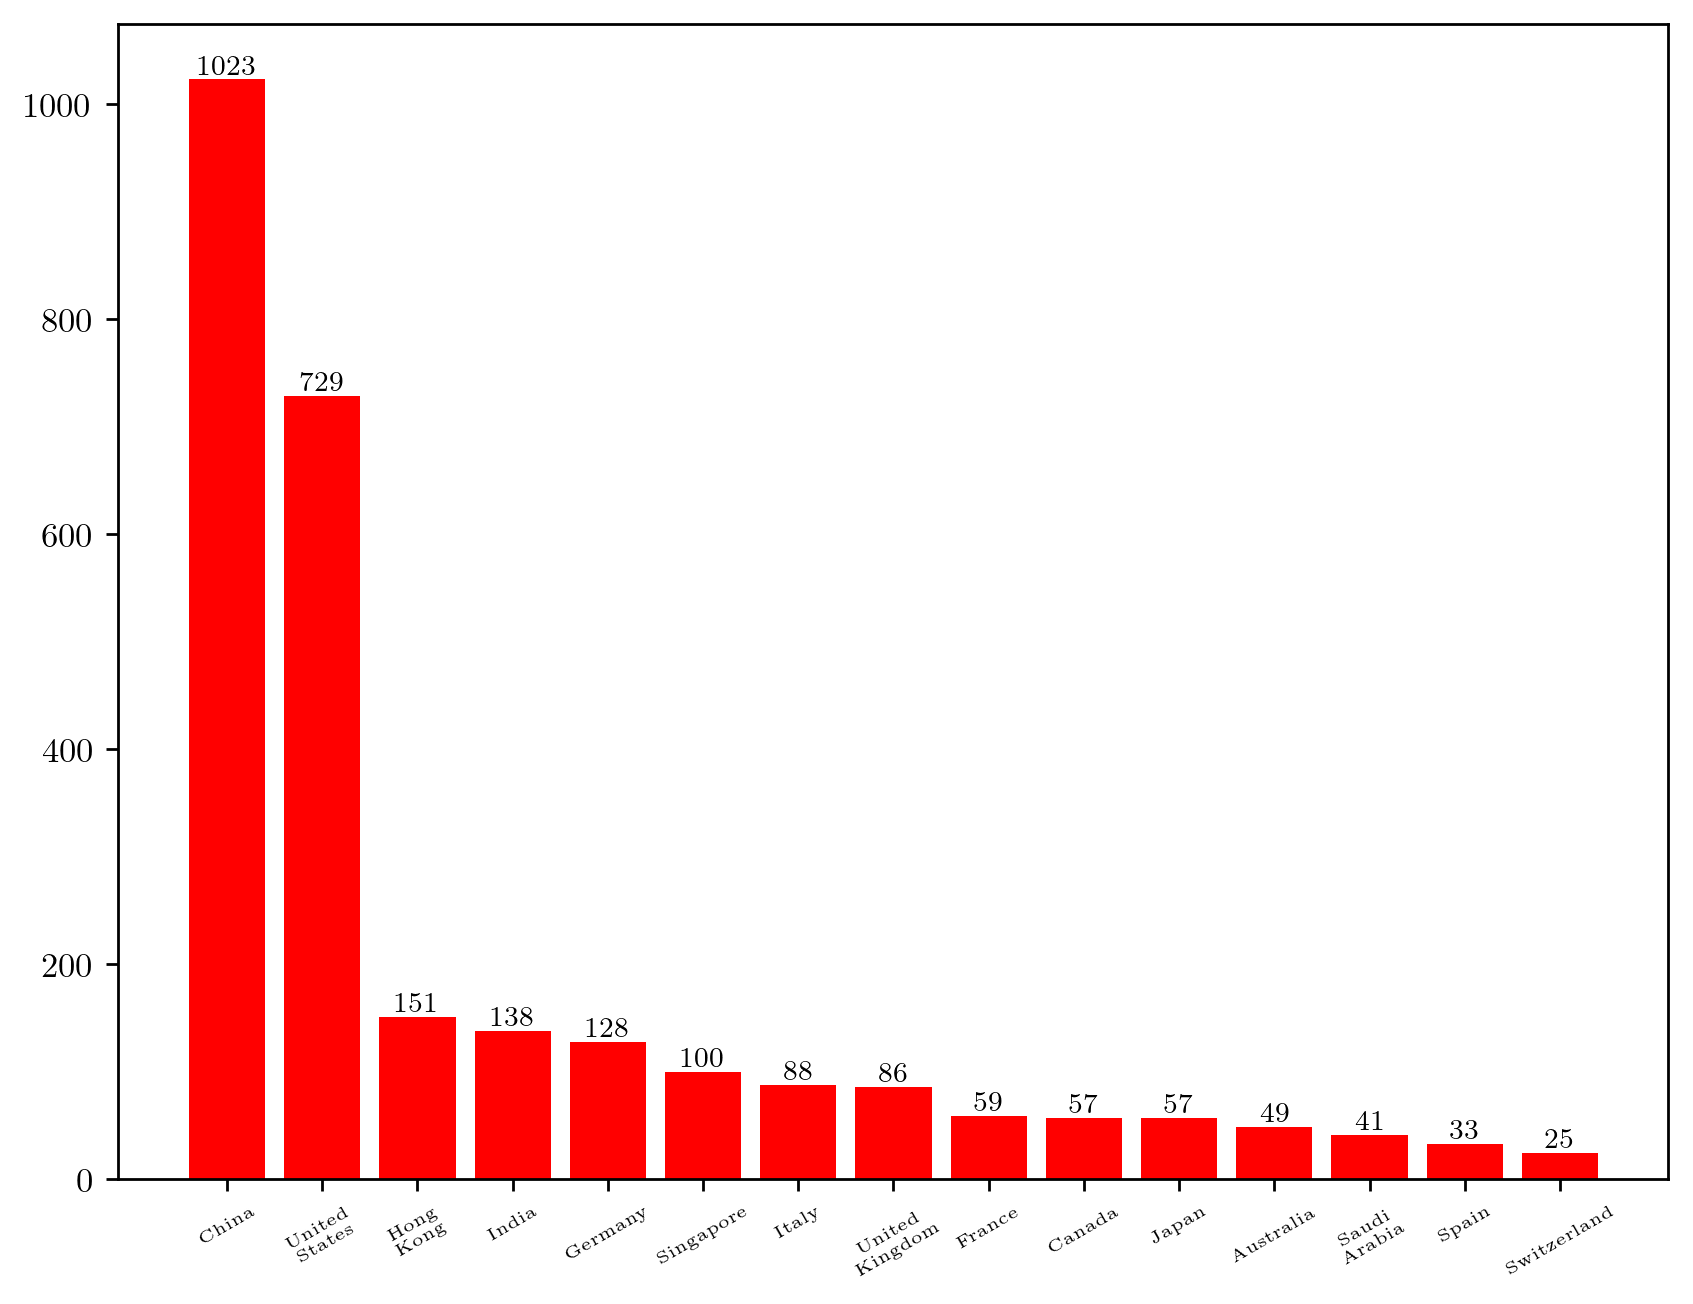

In [144]:
countries = {}
count = 0

for affiliations in PRISMA_df['Affiliations']:
    if not pd.isna(affiliations):
        affiliation = affiliations.replace('; ', ', ').split(', ')
        for country in pycountry.countries:
            for country_affiliation in affiliation:
                if country.name in country_affiliation: 
                    if country.name in countries:
                        countries[country.name] += 1
                    else:
                        countries[country.name] = 0
                        
countries = dict(sorted(countries.items(), key=lambda x:x[1], reverse=True))
N = 15
country_names = [i for i in countries.keys()][:N]
country_frequencies = [i for i in countries.values()][:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    country_names, country_frequencies, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

#ax.set_ylim([0, 15])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
country_names = [country_name.replace(' ', '\n') for country_name in country_names]
ax.set_xticks(range(0, len(country_names)), country_names, rotation=30, fontsize=5)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 2) Most productive Authors

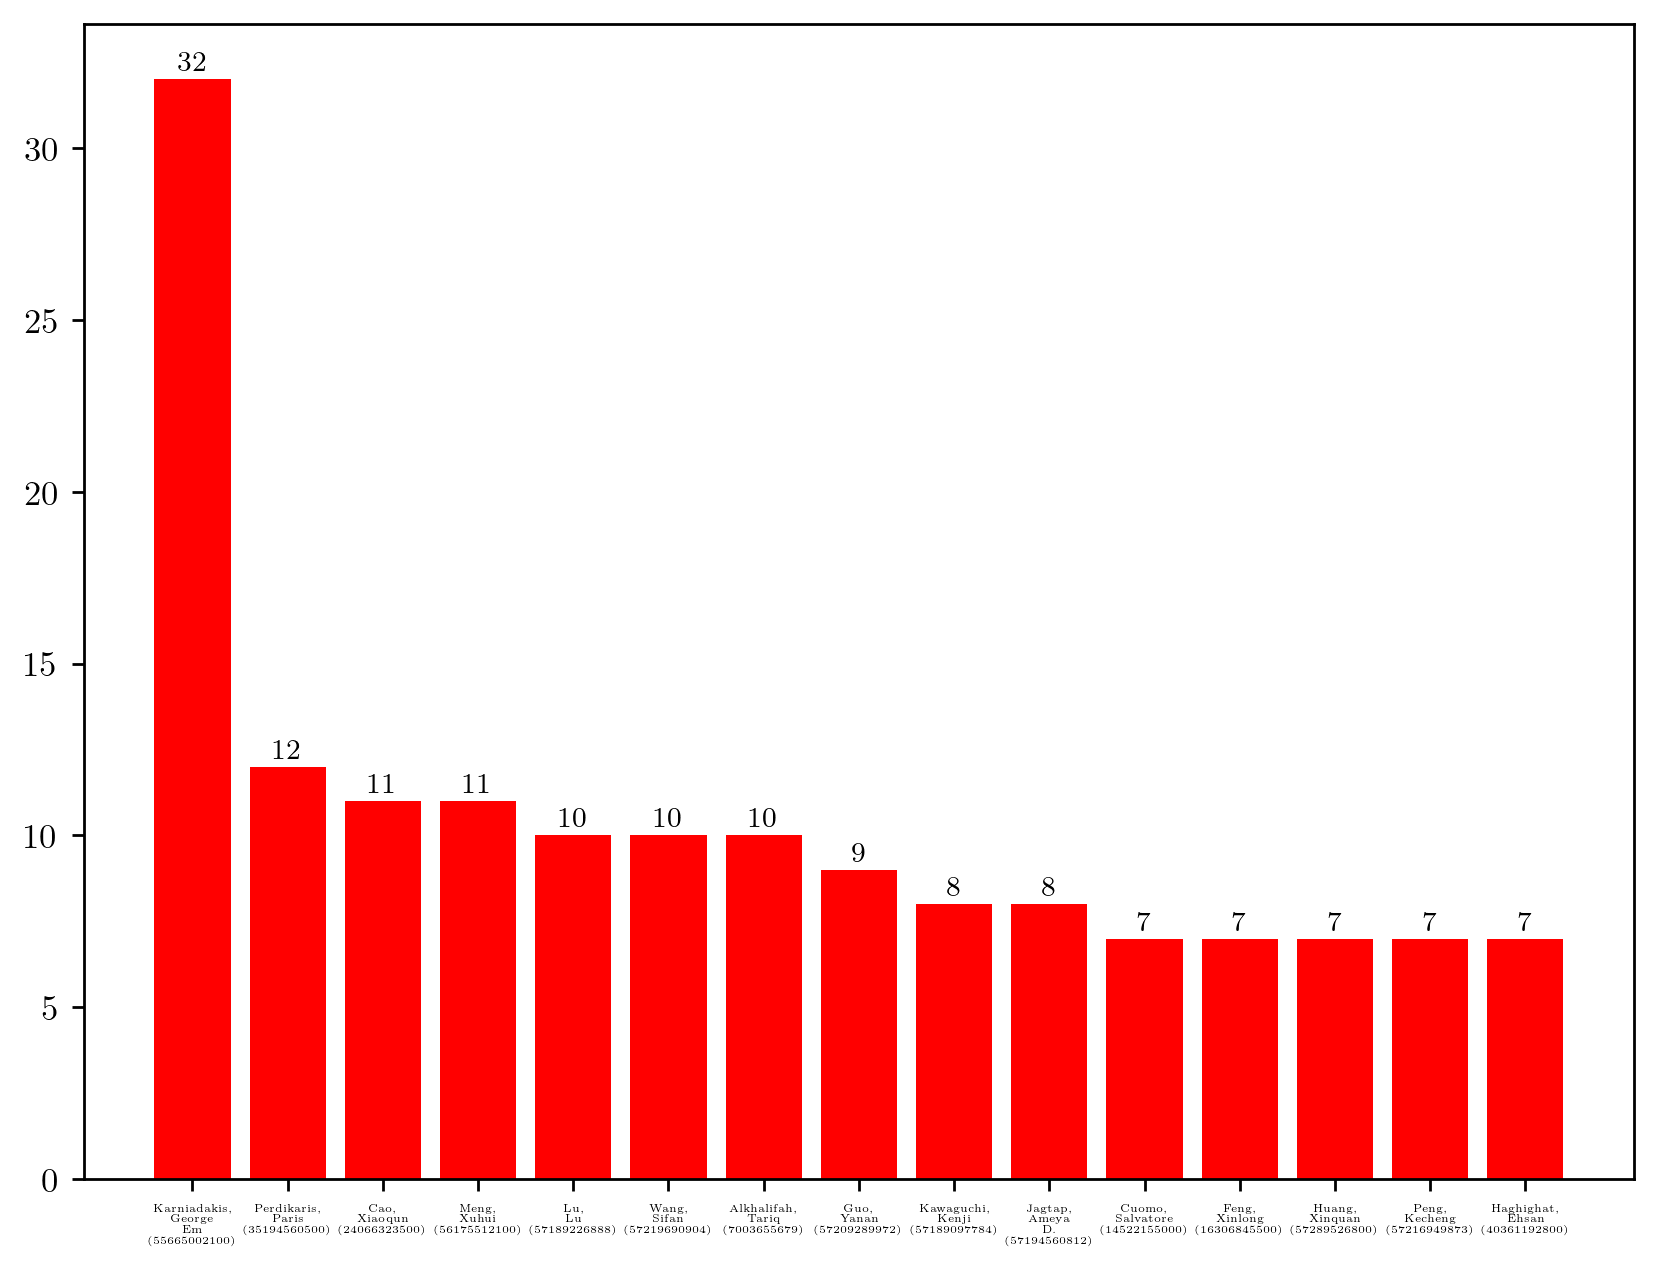

In [146]:
authors = {}
count = 0

for author_names in PRISMA_df['Author full names']:
    if not pd.isna(author_names):
        author_names = author_names.split('; ')
        for author_name in author_names: 
            if author_name in authors:
                authors[author_name] += 1
            else:
                authors[author_name] = 0
                        
authors = dict(sorted(authors.items(), key=lambda x:x[1], reverse=True))
N = 15
author_names = [i for i in authors.keys()][:N]
author_frequencies = [i for i in authors.values()][:N]

fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
bars = ax.bar(
    author_names, author_frequencies, 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )

# ax.set_ylim([0, 5])
# ax.set_xlabel('DRL Method')
# ax.set_ylabel('Count of Papers Discussing LEACH')
# ax.set_title('Count of Papers Discussing LEACH by DRL Method')
author_names = [author_name.replace(' ', '\n') for author_name in author_names]
ax.set_xticks(range(0, len(author_names)), author_names, rotation=0, fontsize=3)
# ax.yaxis.set_major_locator(MultipleLocator(2.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.spines[['right', 'top']].set_visible(True)

## 3) Review article related on topics

In [162]:
review_df = df.loc[
    (
        df['Index Keywords'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Author Keywords'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Title'].str.contains(WORDS, case=False, na=False)
    ) |
    (
        df['Abstract'].str.contains(WORDS, case=False, na=False)
    ) 
]
review_df = review_df.loc[review_df['Language of Original Document'] == 'English']
review_df.loc[review_df['Document Type'] == 'Review'].to_excel('./SOTA/Review paper PDE.xlsx', index=False)
review_df.loc[review_df['Document Type'] == 'Review']

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
434,Hu H.; Qi L.; Chao X.,"Hu, Haoteng (58306392000); Qi, Lehua (72021491...",58306392000; 7202149172; 56943101000,Physics-informed Neural Networks (PINN) for co...,2024,Thin-Walled Structures,205,NaN,112495,NaN,...,NaN,TWASD,NaN,English,Thin-Walled Struct,Review,Final,NaN,Scopus,2-s2.0-85205598282
461,Cai K.; Wang J.,"Cai, Kang (57222404865); Wang, Jiayao (5722335...",57222404865; 57223356533,Physics-informed neural networks for solving i...,2024,Physics of Fluids,36,12,121303,NaN,...,NaN,PHFLE,NaN,English,Phys. Fluids,Review,Final,NaN,Scopus,2-s2.0-85211991419
848,Hou X.; Zhou X.; Liu Y.,"Hou, Xianrui (56270506800); Zhou, Xingyu (5816...",56270506800; 58166338700; 57201929930,Reconstruction of ship propeller wake field ba...,2024,Ocean Engineering,309,NaN,118341,NaN,...,NaN,NaN,NaN,English,Ocean Eng.,Review,Final,NaN,Scopus,2-s2.0-85195504372
936,Farea A.; Yli-Harja O.; Emmert-Streib F.,"Farea, Amer (57913000200); Yli-Harja, Olli (55...",57913000200; 55880982100; 15057742200,Understanding Physics-Informed Neural Networks...,2024,AI (Switzerland),5,3,NaN,1534,...,NaN,NaN,NaN,English,AI.,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85205223148
1484,YANG F.; YANG L.; ZHU Y.,"YANG, Fuyunxiang (57222107648); YANG, Leping (...",57222107648; 35761825300; 15764036000,A physics-informed deep learning framework for...,2024,Chinese Journal of Aeronautics,37,5,NaN,363,...,NaN,CJAEE,NaN,English,Chin J Aeronaut,Review,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85189320543
1537,Dieva N.; Aminev D.; Kravchenko M.; Smirnov N.,"Dieva, Nina (56369921600); Aminev, Damir (5724...",56369921600; 57244818400; 7004264665; 57210524341,Overview of the Application of Physically Info...,2024,Computation,12,4,69,NaN,...,NaN,NaN,NaN,English,Computation,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85191296974
1984,Mortazavi B.,"Mortazavi, Bohayra (24399312200)",24399312200,Recent Advances in Machine Learning-Assisted M...,2024,Advanced Energy Materials,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Adv. Energy Mater.,Review,Article in press,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85211795971
2752,Chen X.-X.; Zhang P.; Yin Z.-Y.,"Chen, Xiao-Xuan (58095205300); Zhang, Pin (572...",58095205300; 57204110119; 36452648400,Physics-Informed neural network solver for num...,2024,Georisk,18,1,NaN,33,...,NaN,NaN,NaN,English,Georisk,Review,Final,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85186240891
3499,Lino M.; Fotiadis S.; Bharath A.A.; Cantwell C.D.,"Lino, Mario (57221634437); Fotiadis, Stathi (5...",57221634437; 57219587214; 6701719807; 36107061000,Current and emerging deep-learning methods for...,2023,Proceedings of the Royal Society A: Mathematic...,479,2275,20230058,NaN,...,NaN,NaN,NaN,English,Proc. R. Soc. A Math. Phys. Eng. Sci.,Review,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85166392341
4609,Lawal Z.K.; Yassin H.; Lai D.T.C.; Che Idris A.,"Lawal, Zaharaddeen Karami (57223286940); Yassi...",57223286940; 57219666742; 57199649884; 5582123...,Physics-Informed Neural Network (PINN) Evoluti...,2022,Big Data and Cognitive Computing,6,4,140,NaN,...,NaN,NaN,NaN,English,Big Data Cogn. Computing,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85144596243


## 4) Collect article based on given topic

In [183]:
TOPICS = [
    'linear|Linear', 
    'nonlinear|non-linear|Non-linear', 
    'First-Order|First order', 
    'Second-Order|second order', 
    'High-Order|High order',
    'Homogenous|homogenous',
    'Non-homogenous|non homogenous|non-homogenous',
    'Elliptic|elliptic',
    'Parabolic|parabolic',
    'Hyperbolic|hyperbolic',
    'Time-dependent|time dependent|Time dependent',
    'Time-independent|time independent|Time independent',
]
for TOPIC in TOPICS:
    FILE_NAME = TOPIC.replace('|', ' OR ')
    PATH = f'./SOTA/{FILE_NAME}'
    data = PRISMA_df.loc[
        PRISMA_df['Title'].str.contains(TOPIC, case=True) |
        PRISMA_df['Index Keywords'].str.contains(TOPIC, case=True) |
        PRISMA_df['Author Keywords'].str.contains(TOPIC, case=True) |
        PRISMA_df['Abstract'].str.contains(TOPIC, case=True) 
    ]
    if not os.path.exists(PATH):
        
        os.mkdir(PATH)
        data.to_excel(f'{PATH}/{FILE_NAME}.xlsx', index=False)
        
    number_of_articles = len(data)
    print(f"\n\nTotal number on topic ( {TOPIC} ): {number_of_articles}")
    for i in data['Title']:
        print(f'\t\t{i}')



Total number on topic ( linear|Linear ): 428
		Reconstructing 3D temperature fields from sparse discrete data by analytical solution-embedded neural network
		Combining physics-informed graph neural network and finite difference for solving forward and inverse spatiotemporal PDEs
		Physics-informed neural networks with adaptive loss weighting algorithm for solving partial differential equations
		Randomized physics-informed neural networks for Bayesian data assimilation
		Scalable marginalized particle filter to improve state estimation of one-way coupled PDE systems
		A practical existence theorem for reduced order models based on convolutional autoencoders
		Constrained or unconstrained? Neural-network-based equation discovery from data
		An advanced physics-informed neural operator for comprehensive design optimization of highly-nonlinear systems: An aerospace composites processing case study
		A deep learning approach: Physics-informed neural networks for solving the 2D nonlinear

## 6) Search based on topics

In [166]:
TOPIC = 'non-homogenous' # (Homomgenous AND PDE) OR reinforcement

data = PRISMA_df.loc[
    PRISMA_df['Title'].str.contains(TOPIC) |
    PRISMA_df['Index Keywords'].str.contains(TOPIC) |
    PRISMA_df['Author Keywords'].str.contains(TOPIC) |
    PRISMA_df['Abstract'].str.contains(TOPIC) 
]
number_of_articles = len(data)

print(f"Total number on topic ( {TOPIC} ): {number_of_articles}\n")
for i in data['Title']:
    print(f'\t\t{i}')

Total number on topic ( non-homogenous ): 0



In [179]:
if not os.path.exists(f'./SOTA/reviewa paper'):
    print('a')

a
